<a href="https://colab.research.google.com/github/nkumarcc/2048-NN/blob/master/my2048-rl-theano-n-tuple-Copy7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup CUDA version that matches the current framework

In [1]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-headless-525-server' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-headless-no-dkms-515-open' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-gds' for glob 'nvidia*'
Note,

In [2]:
!nvcc --version

/bin/bash: nvcc: command not found


In [3]:
# !wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
# !dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

# !apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub

!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

# !apt-key add /var/cuda-repo-8-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=8.0.61-1

--2023-03-11 21:59:17--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.20.126
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.20.126|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/downloads/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb [following]
--2023-03-11 21:59:18--  https://developer.nvidia.com/downloads/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?gnh8gY9t-P6O43ZJy0A8uSaMXp8Cn93-3ZcveHBKsxIFz7eSZ3aYaCATk

In [4]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


### Setup cudNN version that matches the current framework

In [5]:
!find / -name libcudnn.so*

/usr/lib/x86_64-linux-gnu/libcudnn.so
/usr/lib/x86_64-linux-gnu/libcudnn.so.8
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.7.0
/usr/local/lib/python3.9/dist-packages/torch/lib/libcudnn.so.8
find: ‘/proc/57/task/57/net’: Invalid argument
find: ‘/proc/57/net’: Invalid argument


This location of the files means that the `cudNN` installation is system-wide not just one location.

In [6]:
!ls /usr/local/cuda/include

builtin_types.h		       math_functions_dbl_ptx3.h
channel_descriptor.h	       math_functions_dbl_ptx3.hpp
CL			       math_functions.h
common_functions.h	       math_functions.hpp
crt			       nppcore.h
cublas_api.h		       nppdefs.h
cublas.h		       npp.h
cublas_v2.h		       nppi_arithmetic_and_logical_operations.h
cublasXt.h		       nppi_color_conversion.h
cuComplex.h		       nppi_compression_functions.h
cuda_device_runtime_api.h      nppi_computer_vision.h
cuda_fp16.h		       nppi_data_exchange_and_initialization.h
cudaGL.h		       nppi_filtering_functions.h
cuda_gl_interop.h	       nppi_geometry_transforms.h
cuda.h			       nppi.h
cudalibxt.h		       nppi_linear_transforms.h
cuda_occupancy.h	       nppi_morphological_operations.h
cuda_profiler_api.h	       nppi_statistics_functions.h
cudaProfiler.h		       nppi_support_functions.h
cuda_runtime_api.h	       nppi_threshold_and_compare_operations.h
cuda_runtime.h		       npps_arithmetic_and_logical_operations.h
cuda_surface_types.h	  

In [14]:
!wget https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v6/prod/8.0_20170307/Ubuntu16_04_x64/libcudnn6_6.0.20-1+cuda8.0_amd64-deb

--2023-03-11 21:21:52--  https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v6/prod/8.0_20170307/Ubuntu16_04_x64/libcudnn6_6.0.20-1+cuda8.0_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v6/prod/8.0_20170427/ubuntu16_04_x64/libcudnn6_6.0.21-1%2Bcuda8.0_amd64-deb [following]
--2023-03-11 21:21:52--  https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v6/prod/8.0_20170427/ubuntu16_04_x64/libcudnn6_6.0.21-1%2Bcuda8.0_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/downloads/compute/machine-learning/cudnn/secure/v6/prod/8.0_20170427/ubuntu16_04_x64/libcudnn6_6.0.21-1+cuda8.0_amd64

In [8]:
# !wget -c http://developer.download.nvidia.com/compute/redist/cudnn/v7.2.1/cudnn-9.0-linux-x64-v7.2.1.38.tgz
!wget -c http://developer.download.nvidia.com/compute/redist/cudnn/v6.0/cudnn-8.0-linux-x64-v6.0.tgz

--2023-03-11 22:07:29--  http://developer.download.nvidia.com/compute/redist/cudnn/v6.0/cudnn-8.0-linux-x64-v6.0.tgz
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.20.126
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.20.126|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.download.nvidia.com/compute/redist/cudnn/v6.0/cudnn-8.0-linux-x64-v6.0.tgz [following]
--2023-03-11 22:07:29--  https://developer.download.nvidia.com/compute/redist/cudnn/v6.0/cudnn-8.0-linux-x64-v6.0.tgz
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.20.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201134139 (192M) [application/x-compressed]
Saving to: ‘cudnn-8.0-linux-x64-v6.0.tgz’

cudnn-8.0-linux-x64 100%[===================>] 191.82M  23.9MB/s    in 9.4s    

2023-03-11 22:07:39 (20.4 MB/s) - ‘cudnn-8.0-linux-x64-v

In [9]:
!tar -xzvf cudnn-8.0-linux-x64-v6.0.tgz

cuda/include/cudnn.h
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.6
cuda/lib64/libcudnn.so.6.0.21
cuda/lib64/libcudnn_static.a


In [10]:
!ls /usr/include | grep cudnn

cudnn_adv_infer.h
cudnn_adv_train.h
cudnn_backend.h
cudnn_cnn_infer.h
cudnn_cnn_train.h
cudnn.h
cudnn_ops_infer.h
cudnn_ops_train.h
cudnn_version.h


In [11]:
!cp cuda/include/cudnn.h /usr/include/

In [12]:
!ls /usr/lib/x86_64-linux-gnu | grep libcudnn

libcudnn_adv_infer.so
libcudnn_adv_infer.so.8
libcudnn_adv_infer.so.8.7.0
libcudnn_adv_infer_static.a
libcudnn_adv_infer_static_v8.a
libcudnn_adv_train.so
libcudnn_adv_train.so.8
libcudnn_adv_train.so.8.7.0
libcudnn_adv_train_static.a
libcudnn_adv_train_static_v8.a
libcudnn_cnn_infer.so
libcudnn_cnn_infer.so.8
libcudnn_cnn_infer.so.8.7.0
libcudnn_cnn_infer_static.a
libcudnn_cnn_infer_static_v8.a
libcudnn_cnn_train.so
libcudnn_cnn_train.so.8
libcudnn_cnn_train.so.8.7.0
libcudnn_cnn_train_static.a
libcudnn_cnn_train_static_v8.a
libcudnn_ops_infer.so
libcudnn_ops_infer.so.8
libcudnn_ops_infer.so.8.7.0
libcudnn_ops_infer_static.a
libcudnn_ops_infer_static_v8.a
libcudnn_ops_train.so
libcudnn_ops_train.so.8
libcudnn_ops_train.so.8.7.0
libcudnn_ops_train_static.a
libcudnn_ops_train_static_v8.a
libcudnn.so
libcudnn.so.8
libcudnn.so.8.7.0


In [13]:
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so*

lrwxrwxrwx 1 root root     29 Feb  2 05:57 /usr/lib/x86_64-linux-gnu/libcudnn.so -> /etc/alternatives/libcudnn_so
lrwxrwxrwx 1 root root     17 Nov 21 20:14 /usr/lib/x86_64-linux-gnu/libcudnn.so.8 -> libcudnn.so.8.7.0
-rw-r--r-- 1 root root 150200 Nov 21 20:14 /usr/lib/x86_64-linux-gnu/libcudnn.so.8.7.0


In [14]:
!ls -l cuda/lib64

total 291192
lrwxrwxrwx 1 1000 users        13 Apr 12  2017 libcudnn.so -> libcudnn.so.6
lrwxrwxrwx 1 1000 users        18 Apr 12  2017 libcudnn.so.6 -> libcudnn.so.6.0.21
-rwxr-xr-x 1 1000 users 154322864 Apr 12  2017 libcudnn.so.6.0.21
-rw-r--r-- 1 1000 users 143843808 Apr 12  2017 libcudnn_static.a


In [15]:
!cp cuda/lib64/libcudnn* /usr/lib/x86_64-linux-gnu/

In [16]:
!chmod a+r /usr/lib/x86_64-linux-gnu/libcudnn*

In [17]:
!chmod a+r /usr/include/cudnn.h

In [27]:
!echo $LD_LIBRARY_PATH

/usr/lib64-nvidia


In [28]:
!echo $CPATH

In [29]:
!ls /usr/lib64-nvidia

gbm				  libnvidia-egl-wayland.so.1
libcudadebugger.so.1		  libnvidia-egl-wayland.so.1.1.10
libcudadebugger.so.525.85.12	  libnvidia-encode.so
libcuda.so			  libnvidia-encode.so.1
libcuda.so.1			  libnvidia-encode.so.525.85.12
libcuda.so.525.85.12		  libnvidia-fbc.so
libEGL_nvidia.so.0		  libnvidia-fbc.so.1
libEGL_nvidia.so.525.85.12	  libnvidia-fbc.so.525.85.12
libEGL.so			  libnvidia-glcore.so.525.85.12
libEGL.so.1			  libnvidia-glsi.so.525.85.12
libEGL.so.1.1.0			  libnvidia-glvkspirv.so.525.85.12
libGLdispatch.so.0		  libnvidia-gtk2.so.525.85.12
libGLESv1_CM_nvidia.so.1	  libnvidia-gtk3.so.525.85.12
libGLESv1_CM_nvidia.so.525.85.12  libnvidia-ml.so
libGLESv1_CM.so			  libnvidia-ml.so.1
libGLESv1_CM.so.1		  libnvidia-ml.so.525.85.12
libGLESv1_CM.so.1.2.0		  libnvidia-ngx.so.1
libGLESv2_nvidia.so.2		  libnvidia-ngx.so.525.85.12
libGLESv2_nvidia.so.525.85.12	  libnvidia-nvvm.so
libGLESv2.so			  libnvidia-nvvm.so.4
libGLESv2.so.2			  libnvidia-nvvm.so.525.85.12
libGLESv2.so.2.1.0		  li

In [26]:
!export LD_LIBRARY_PATH=/usr/lib/x86_64-linux-gnu/:$LD_LIBRARY_PATH
!export CPATH=/usr/include:$CPATH

In [32]:
# !rm /usr/lib/x86_64-linux-gnu/libcudnn.so.7 
# !rm /usr/local/cuda/targets/x86_64-linux/lib/libcudnn.so.7
!rm /usr/lib/x86_64-linux-gnu/libcudnn.so.6 /usr/lib/x86_64-linux-gnu/libcudnn.so.6.0.21
# /usr/lib/x86_64-linux-gnu/libcudnn.so.7.2.1 /usr/lib/x86_64-linux-gnu/libcudnn_static.a

In [33]:
# !cp cuda/lib64/libcudnn* /usr/local/cuda/lib64
!ln -s cuda/lib64/libcudnn.so.6 /usr/lib/x86_64-linux-gnu/libcudnn.so.6
!ln -s cuda/lib64/libcudnn.so.6.0.21 /usr/lib/x86_64-linux-gnu/libcudnn.so.6.0.21
!ln -s cuda/lib64/libcudnn_static.a /usr/lib/x86_64-linux-gnu/libcudnn_static.a

ln: failed to create symbolic link '/usr/lib/x86_64-linux-gnu/libcudnn_static.a': File exists


In [34]:
!ldconfig

In [35]:
!ls -l /usr/local/cuda/lib64 | grep libcudnn

In [36]:
!ls -l /usr/lib/x86_64-linux-gnu | grep libcudnn

lrwxrwxrwx  1 root root        39 Feb  2 05:57 libcudnn_adv_infer.so -> /etc/alternatives/libcudnn_adv_infer_so
lrwxrwxrwx  1 root root        27 Nov 21 20:14 libcudnn_adv_infer.so.8 -> libcudnn_adv_infer.so.8.7.0
-rw-r--r--  1 root root 130381904 Nov 21 20:14 libcudnn_adv_infer.so.8.7.0
-rw-r--r--  1 root root 132979922 Nov 21 20:14 libcudnn_adv_infer_static.a
lrwxrwxrwx  1 root root        27 Nov 21 20:14 libcudnn_adv_infer_static_v8.a -> libcudnn_adv_infer_static.a
lrwxrwxrwx  1 root root        39 Feb  2 05:57 libcudnn_adv_train.so -> /etc/alternatives/libcudnn_adv_train_so
lrwxrwxrwx  1 root root        27 Nov 21 20:14 libcudnn_adv_train.so.8 -> libcudnn_adv_train.so.8.7.0
-rw-r--r--  1 root root 121095120 Nov 21 20:14 libcudnn_adv_train.so.8.7.0
-rw-r--r--  1 root root 123566296 Nov 21 20:14 libcudnn_adv_train_static.a
lrwxrwxrwx  1 root root        27 Nov 21 20:14 libcudnn_adv_train_static_v8.a -> libcudnn_adv_train_static.a
lrwxrwxrwx  1 root root        39 Feb  2 05:57 libcudn

In [37]:
!cat /usr/include/cudnn.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR      6
#define CUDNN_MINOR      0
#define CUDNN_PATCHLEVEL 21
--
#define CUDNN_VERSION    (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [9]:
!which python

/usr/local/bin/python


In [10]:
!ldd /usr/local/bin/python | grep libcudnn

	not a dynamic executable


***

### Add `lasagne` and `theano`

In [1]:
!pip install -r https://raw.githubusercontent.com/Lasagne/Lasagne/master/requirements.txt
!pip install https://github.com/Lasagne/Lasagne/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Theano: filename=Theano-1.0.5-py3-none-any.whl size=2668112 sha256=be305e918e15de731f8bc2c5a2184718e4360172b5be24f66a4f53bcb31742be
  Stored in directory: /root/.cache/pip/wheels/12/d8/36/e9b7c617ca8be398dcc48621c539d0cb1d41ff04e4367fc235
Successfully built Theano
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 232.0 kB 8.5 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Lasagne: filename=Lasagne-0.2.dev1-py3-none-any.whl size=122805 sha256=5eb5ba82f38e0390fe487eac53d9c705d6967b2adfd21324a3c90edb9b2aafa5
  Stored in directory: /tmp/pip-ephem-wheel-cache-rxbfxchh/wheels/07/c0/de/4506ee2cba3b1ff8a275c3293eebc5d2a689c57042a45e64de
Successfully built Lasagne


In [2]:
!pip install --upgrade numpy==1.20.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 31.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cmdstanpy 1.1.0 requires numpy>=1.21, but you have numpy 1.20.3 which is incompatible.


In [3]:
!git clone https://github.com/Theano/libgpuarray.git

Cloning into 'libgpuarray'...
remote: Enumerating objects: 11420, done.
remote: Total 11420 (delta 0), reused 0 (delta 0), pack-reused 11420
Receiving objects: 100% (11420/11420), 2.59 MiB | 15.05 MiB/s, done.
Resolving deltas: 100% (8379/8379), done.


In [4]:
!mkdir libgpuarray/Build
!cd libgpuarray/Build && cmake .. -DCMAKE_BUILD_TYPE=Release && make && make install

-- The C compiler identification is GNU 9.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
CMake Deprecation Warning at CMakeLists.txt:26 (cmake_policy):
  The OLD behavior for policy CMP0063 will be removed from a future version
  of CMake.

  The cmake-policies(7) manual explains that the OLD behaviors of all
  policies are deprecated and that a policy should be set to OLD only under
  specific short-term circumstances.  Projects should be ported to the NEW
  behavior and not rely on setting a policy to OLD.


-- Looking for strlcat
-- Looking for strlcat - not found
-- Looking for mkstemp
-- Looking for mkstemp - found
-- Found PkgConfig: /usr/bin/pkg-config (found version "0.29.1") 
-- Checking for one of the modules 'check'
Tests disabled because Check was not found
-- Configuring done
-- Generating done
-- Build files have been 

In [5]:
# !cd libgpuarray && python setup.py build_ext -L /contaxt/libgpuarray/lib -I /contaxt/libgpuarray/include
!cd libgpuarray && python setup.py build
!cd libgpuarray && python setup.py install

Compiling pygpu/gpuarray.pyx because it changed.
Compiling pygpu/blas.pyx because it changed.
Compiling pygpu/_elemwise.pyx because it changed.
Compiling pygpu/collectives.pyx because it changed.
[1/4] Cythonizing pygpu/_elemwise.pyx
/usr/local/lib/python3.9/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/libgpuarray/pygpu/_elemwise.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/4] Cythonizing pygpu/blas.pyx
/usr/local/lib/python3.9/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/libgpuarray/pygpu/blas.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/4] Cythonizing pygpu/collectives.pyx
/usr/local/lib/python3.9/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, us

In [43]:
!pip show pygpu

Name: pygpu
Version: 0.7.6+20.g9cec614
Summary: numpy-like wrapper on libgpuarray for GPU computations
Home-page: UNKNOWN
Author: 
Author-email: 
License: UNKNOWN
Location: /usr/local/lib/python3.9/dist-packages/pygpu-0.7.6+20.g9cec614-py3.9-linux-x86_64.egg
Requires: mako, six
Required-by: 


In [44]:
import os
os.environ['THEANO_FLAGS'] = 'device=cuda'

In [45]:
import sys
sys.path.append('/content/libgpuarray/lib')
sys.path.append('/usr/local/lib/python3.9/dist-packages/pygpu-0.7.6+20.g9cec614-py3.9-linux-x86_64.egg/pygpu')
sys.path

['/content',
 '/env/python',
 '/usr/lib/python39.zip',
 '/usr/lib/python3.9',
 '/usr/lib/python3.9/lib-dynload',
 '',
 '/usr/local/lib/python3.9/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.9/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/libgpuarray/lib',
 '/usr/local/lib/python3.9/dist-packages/pygpu-0.7.6+20.g9cec614-py3.9-linux-x86_64.egg/pygpu']

In [46]:
sys.path.append('/usr/local/lib/python3.9/dist-packages/pygpu-0.7.6+20.g9cec614-py3.9-linux-x86_64.egg/pygpu')
sys.path

['/content',
 '/env/python',
 '/usr/lib/python39.zip',
 '/usr/lib/python3.9',
 '/usr/lib/python3.9/lib-dynload',
 '',
 '/usr/local/lib/python3.9/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.9/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/libgpuarray/lib',
 '/usr/local/lib/python3.9/dist-packages/pygpu-0.7.6+20.g9cec614-py3.9-linux-x86_64.egg/pygpu',
 '/usr/local/lib/python3.9/dist-packages/pygpu-0.7.6+20.g9cec614-py3.9-linux-x86_64.egg/pygpu']

In [47]:
!ls /usr/local/lib/python3.9/dist-packages/pygpu-0.7.6+20.g9cec614-py3.9-linux-x86_64.egg/pygpu

_array.py
basic.py
blas_api.h
blas.c
blas.cpython-39-x86_64-linux-gnu.so
blas.py
collectives_api.h
collectives.c
collectives.cpython-39-x86_64-linux-gnu.so
collectives.h
collectives.py
dtypes.py
_elemwise.c
_elemwise.cpython-39-x86_64-linux-gnu.so
_elemwise.py
elemwise.py
gpuarray_api.h
gpuarray.c
gpuarray.cpython-39-x86_64-linux-gnu.so
gpuarray.h
gpuarray.py
__init__.py
numpy_compat.h
operations.py
__pycache__
reduction.py
tests
tools.py
_version.py


In [48]:
os.environ['LD_LIBRARY_PATH'] = '/content/libgpuarray/lib:' + os.environ['LD_LIBRARY_PATH']

In [1]:
!ldconfig

In [50]:
!pip install pygpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pygpu

***

In [9]:
# !wget https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v6/prod/8.0_20170307/Ubuntu16_04_x64/libcudnn6_6.0.20-1+cuda8.0_amd64-deb

--2023-03-11 20:55:41--  https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v6/prod/8.0_20170307/Ubuntu16_04_x64/libcudnn6_6.0.20-1+cuda8.0_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v6/prod/8.0_20170427/ubuntu16_04_x64/libcudnn6_6.0.21-1%2Bcuda8.0_amd64-deb [following]
--2023-03-11 20:55:42--  https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v6/prod/8.0_20170427/ubuntu16_04_x64/libcudnn6_6.0.21-1%2Bcuda8.0_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/downloads/compute/machine-learning/cudnn/secure/v6/prod/8.0_20170427/ubuntu16_04_x64/libcudnn6_6.0.21-1+cuda8.0_amd64

In [10]:
# !dpkg -i libcudnn6_6.0.20-1+cuda8.0_amd64-deb

dpkg-deb: error: 'libcudnn6_6.0.20-1+cuda8.0_amd64-deb' is not a Debian format archive
dpkg: error processing archive libcudnn6_6.0.20-1+cuda8.0_amd64-deb (--install):
 dpkg-deb --control subprocess returned error exit status 2
Errors were encountered while processing:
 libcudnn6_6.0.20-1+cuda8.0_amd64-deb


In [3]:
!pip show theano

Name: Theano
Version: 1.0.5
Summary: Optimizing compiler for evaluating mathematical expressions on CPUs and GPUs.
Home-page: http://deeplearning.net/software/theano/
Author: LISA laboratory, University of Montreal
Author-email: theano-dev@googlegroups.com
License: BSD
Location: /usr/local/lib/python3.9/dist-packages
Requires: numpy, scipy, six
Required-by: 


In [4]:
import os
os.environ['THEANO_FLAGS'] = 'device=cuda'

import sys
sys.path.append('/content/libgpuarray/lib')
sys.path.append('/usr/local/lib/python3.9/dist-packages/pygpu-0.7.6+20.g9cec614-py3.9-linux-x86_64.egg/pygpu')
sys.path

['/content',
 '/env/python',
 '/usr/lib/python39.zip',
 '/usr/lib/python3.9',
 '/usr/lib/python3.9/lib-dynload',
 '',
 '/usr/local/lib/python3.9/dist-packages',
 '/usr/local/lib/python3.9/dist-packages/pygpu-0.7.6+20.g9cec614-py3.9-linux-x86_64.egg',
 '/usr/local/lib/python3.9/dist-packages/Mako-1.2.4-py3.9.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.9/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/libgpuarray/lib',
 '/usr/local/lib/python3.9/dist-packages/pygpu-0.7.6+20.g9cec614-py3.9-linux-x86_64.egg/pygpu']

In [6]:
import numpy as np
import theano
import theano.tensor as T
import lasagne
from lasagne.layers import DenseLayer, InputLayer, batch_norm, DropoutLayer
from lasagne.layers import  MergeLayer, ReshapeLayer, FlattenLayer, ConcatLayer
floatX = theano.config.floatX
from lasagne.nonlinearities import rectify, elu, softmax, sigmoid
from lasagne.init import Constant, Sparse
floatX = theano.config.floatX

In [9]:
# from lasagne.layers.dnn import Conv2DDNNLayer
from lasagne.layers import Conv2DLayer
from lasagne.regularization import regularize_network_params, l1, l2, regularize_layer_params_weighted

In [21]:
# https://github.com/deepmind/alphafold/issues/483

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [22]:
print(locale.getpreferredencoding())

UTF-8


In [10]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 4.1 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [908 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://archiv

In [14]:
os.environ['LC_CTYPE'] = 'UTF-8'

In [11]:
from random import randint, shuffle, seed
import sys
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [12]:
from IPython.display import clear_output

In [13]:
!wget https://raw.githubusercontent.com/nkumarcc/2048-NN/master/c2048.py

--2023-03-12 00:33:36--  https://raw.githubusercontent.com/nkumarcc/2048-NN/master/c2048.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5949 (5.8K) [text/plain]
Saving to: ‘c2048.py’

c2048.py            100%[===================>]   5.81K  --.-KB/s    in 0s      

2023-03-12 00:33:36 (58.0 MB/s) - ‘c2048.py’ saved [5949/5949]



In [14]:
from c2048 import Game, push

In [8]:
import pygpu

/usr/local/bin/python


In [ ]:
print(theano.config)

/usr/local/lib/python3.9/dist-packages/lasagne/layers/dnn.py:46: UserWarning: You are using a GPU layer with Theano configured for double precision (floatX=float64). Depending on your Theano version and GPU, this may be slow or unsupported.We recommend to configure Theano for single precision (floatX=float32); see http://lasagne.readthedocs.org/en/latest/user/installation.html#gpu-support.
  warnings.warn("You are using a GPU layer with Theano configured for "


In [ ]:
floatX

'float32'

In [15]:
def Winit(shape):
    rtn = np.random.normal(size=shape).astype(floatX)
    rtn[np.random.uniform(size=shape) < 0.9] *= 0.01
    return rtn

In [29]:
!ldconfig -p | grep -e cuda -e cudnn

	libpcsamplingutil.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libpcsamplingutil.so
	libnvrtc.so.11.2 (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvrtc.so.11.2
	libnvrtc.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvrtc.so
	libnvrtc-builtins.so.11.8 (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvrtc-builtins.so.11.8
	libnvrtc-builtins.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvrtc-builtins.so
	libnvperf_target.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvperf_target.so
	libnvperf_host.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvperf_host.so
	libnvjpeg.so.11 (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvjpeg.so.11
	libnvjpeg.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvjpeg.so
	libnvblas.so.11 (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvblas.so.11
	libnvblas.so (libc6,x86-64) => /usr/loc

In [16]:
input_var = T.tensor4()
target_var = T.vector()
N_FILTERS = 512
N_FILTERS2 = 4096

_ = InputLayer(shape=(None, 16, 4, 4), input_var=input_var)

conv_a =  Conv2DLayer(_, N_FILTERS, (2,1), pad='valid')#, W=Winit((N_FILTERS, 16, 2, 1)))
conv_b =  Conv2DLayer(_, N_FILTERS, (1,2), pad='valid')#, W=Winit((N_FILTERS, 16, 1, 2)))

conv_aa =  Conv2DLayer(conv_a, N_FILTERS2, (2,1), pad='valid')#, W=Winit((N_FILTERS2, N_FILTERS, 2, 1)))
conv_ab =  Conv2DLayer(conv_a, N_FILTERS2, (1,2), pad='valid')#, W=Winit((N_FILTERS2, N_FILTERS, 1, 2)))

conv_ba =  Conv2DLayer(conv_b, N_FILTERS2, (2,1), pad='valid')#, W=Winit((N_FILTERS2, N_FILTERS, 2, 1)))
conv_bb =  Conv2DLayer(conv_b, N_FILTERS2, (1,2), pad='valid')#, W=Winit((N_FILTERS2, N_FILTERS, 1, 2)))

_ = ConcatLayer([FlattenLayer(x) for x in [conv_aa, conv_ab, conv_ba, conv_bb, conv_a, conv_b]])
l_out = DenseLayer(_, num_units=1,  nonlinearity=None)

prediction = lasagne.layers.get_output(l_out)
P = theano.function([input_var], prediction)
loss = lasagne.objectives.squared_error(prediction, target_var).mean()/2
# #layers = {conv1: 0.5, conv2: 0.5}
# #l1_penalty = regularize_layer_params_weighted(layers, l1)
# #loss = loss + 1e-4 * l1_penalty
accuracy = lasagne.objectives.squared_error(prediction, target_var).mean()
params = lasagne.layers.get_all_params(l_out, trainable=True)
# #params = [l_out.W]
updates = lasagne.updates.adam(loss, params, beta1=0.5)
# #updates = lasagne.updates.sgd(loss, params, learning_rate=α)
# #updates = lasagne.updates.adamax(loss, params)


train_fn = theano.function([input_var, target_var], loss, updates=updates)
loss_fn = theano.function([input_var, target_var], loss)
accuracy_fn =theano.function([input_var, target_var], accuracy)

In [32]:
!pip show theano

Name: Theano
Version: 1.0.5
Summary: Optimizing compiler for evaluating mathematical expressions on CPUs and GPUs.
Home-page: http://deeplearning.net/software/theano/
Author: LISA laboratory, University of Montreal
Author-email: theano-dev@googlegroups.com
License: BSD
Location: /usr/local/lib/python3.9/dist-packages
Requires: numpy, scipy, six
Required-by: 


In [33]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [35]:
!find / -name "cudnn.h"

find: '/proc/53/task/53/net': Invalid argument
find: '/proc/53/net': Invalid argument
/usr/include/cudnn.h


In [38]:
!cat /usr/include/cudnn_version.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 8
#define CUDNN_MINOR 7
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

/* cannot use constexpr here since this is a C-only file */


In [17]:
import numpy as np
from random import randint

table ={2**i:i for i in range(1,16)}
table[0]=0
def make_input(grid):
    g0 = grid
    r = np.zeros(shape=(16, 4, 4), dtype=float)
    for i in range(4):
        for j in range(4):
            v = g0[i, j]
            r[table[v],i, j]=1
    return r

In [18]:
make_input(table)

KeyError: ignored

In [19]:
logf=open("logf-rl-theano-n-tuple-6", "w")
def printx(*a, **kw):
    print(*a, file=logf, flush=True, **kw)
    print(*a, flush=True, **kw)

In [20]:
from random import random, randint

In [28]:
def get_grid(driver):
    grid = np.zeros(shape=(4,4), dtype='uint16')
    for x in driver.find_elements(By.CLASS_NAME, 'tile'):
        cl = x.get_attribute('class').split()
        for t in cl:
            if t.startswith('tile-position-'):
                pos = int(t[14])-1, int(t[16])-1
            elif t.startswith('tile-') and t[5].isdigit():
                v = int(t[5:])
        grid[pos[1], pos[0]] = v
    return grid

In [22]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [27]:
import math
import time
from collections import defaultdict
from selenium.webdriver.common.by import By
  
def Vchange(grid, v):
    g0 = grid
    g1 = g0[:,::-1,:]
    g2 = g0[:,:,::-1]
    g3 = g2[:,::-1,:]
    r0 = grid.swapaxes(1,2)
    r1 = r0[:,::-1,:]
    r2 = r0[:,:,::-1]
    r3 = r2[:,::-1,:]
    xtrain = np.array([g0,g1,g2,g3,r0,r1,r2,r3], dtype=floatX)
    ytrain = np.array([v]*8, dtype=floatX)
    train_fn(xtrain, ytrain)

arrow=[Keys.ARROW_LEFT, Keys.ARROW_UP, Keys.ARROW_RIGHT, Keys.ARROW_DOWN]
def gen_sample_and_learn(driver):
    body = driver.find_element(By.TAG_NAME, 'body')
    game_len = 0
    game_score = 0
    last_grid = None
    keep_playing =False
    while True:
        try:
            grid_array = get_grid(driver)
        except:
            grid_array = None
        board_list = []
        if grid_array is not None:
            if not keep_playing and grid_array.max()==2048:
                driver.find_element(By.CLASS_NAME, 'keep-playing-button').click()
                keep_playing = True
                time.sleep(1)
            for m in range(4):
                g = grid_array.copy()
                s = push(g, m%4)
                if s >= 0:
                    board_list.append( (g, m, s) )
        if board_list:
            boards = np.array([make_input(g) for g,m,s in board_list], dtype=float)
            p = P(boards).flatten()        
            game_len+=1
            best_move = -1
            best_v = None
            for i, (g,m,s) in enumerate(board_list):
                v = 2*s + p[i]
                if best_v is None or v > best_v:
                    best_v = v
                    best_move = m
                    best_score = 2*s
                    best_grid = boards[i]
            body.send_keys(arrow[best_move])
            game_score += best_score
        else:
            best_v = 0
            best_grid = None
        if last_grid is not None:
            Vchange(last_grid, best_v)       
        last_grid = best_grid
        if not board_list:
            break
        plt.pause(0.05)
    return game_len, grid_array.max(), game_score

In [25]:
!apt-get update
!apt install firefox-geckodriver

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists

<ipython-input-29-bf1e9cd315aa>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(options=options, executable_path='/usr/bin/geckodriver')


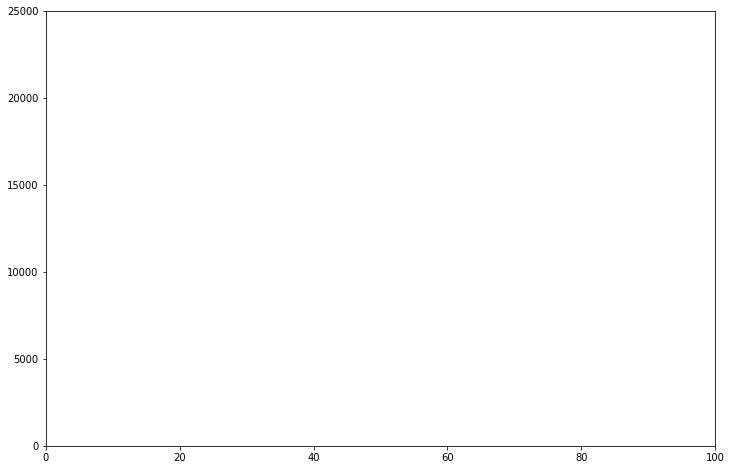

0 (106, 64, 896)


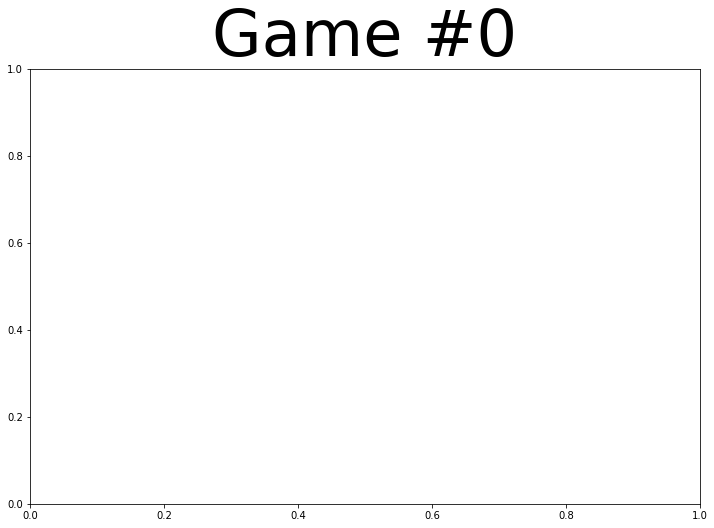

1 (169, 256, 2056)


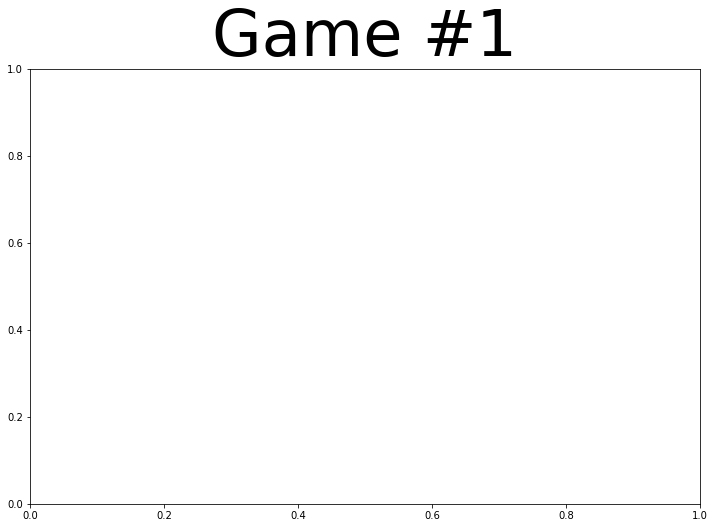

2 (128, 128, 1252)


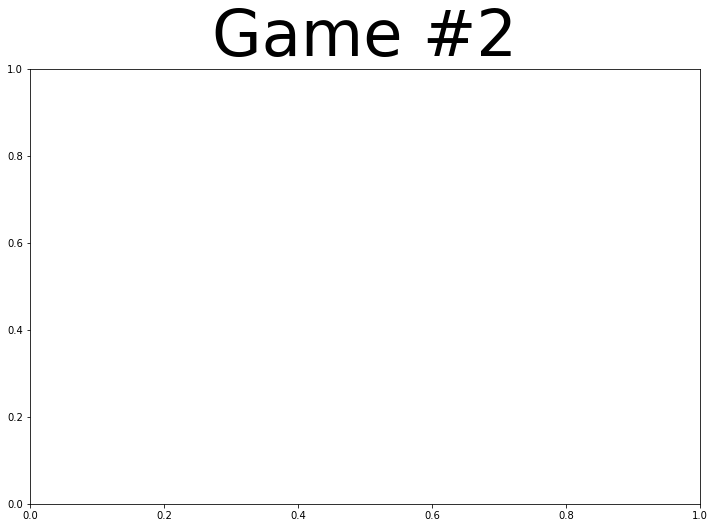

3 (170, 128, 1608)


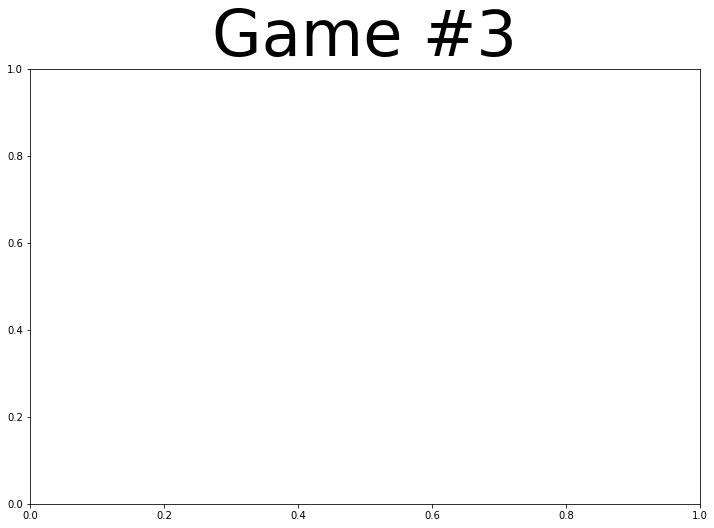

4 (355, 512, 5224)


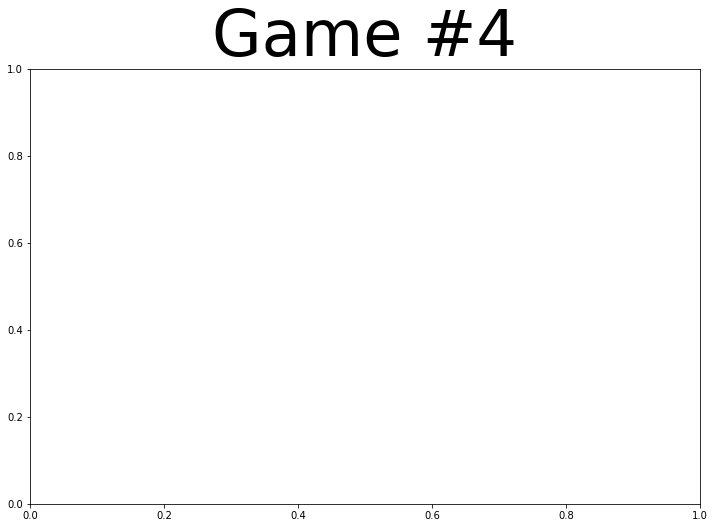

5 (245, 256, 3060)


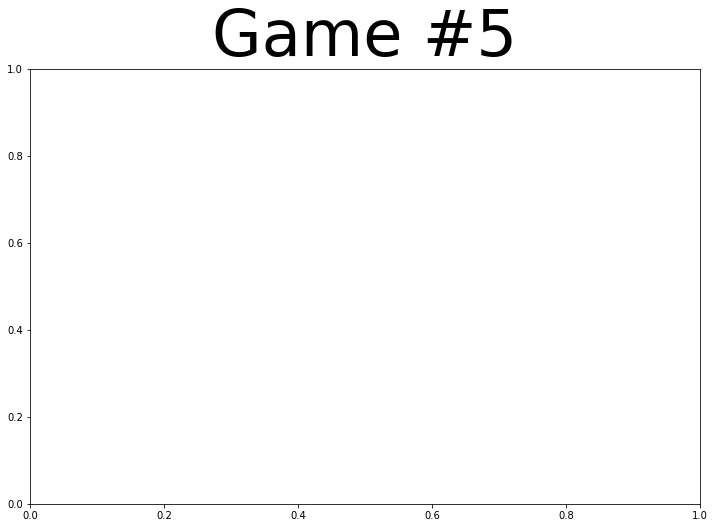

6 (496, 512, 7040)


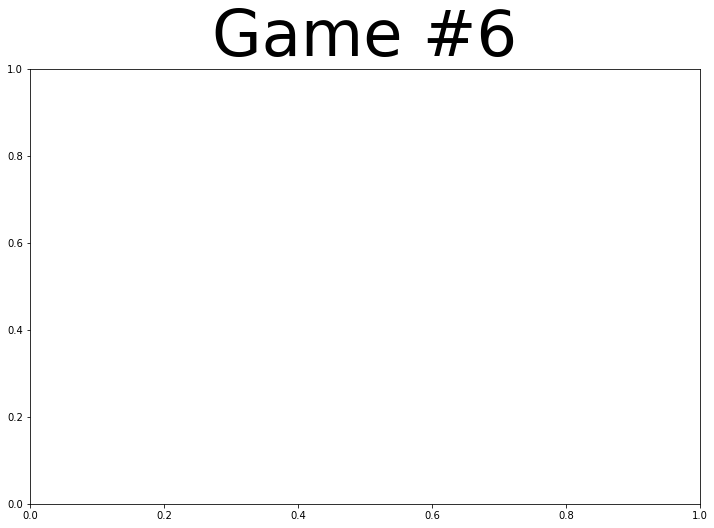

7 (246, 256, 2788)


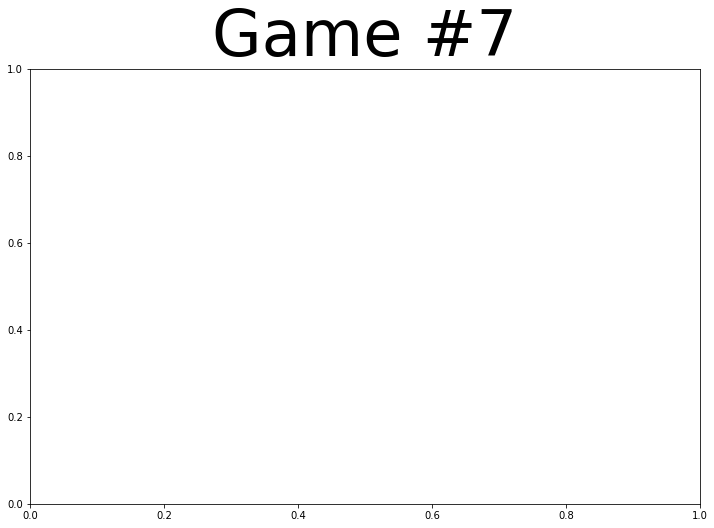

8 (157, 128, 1476)


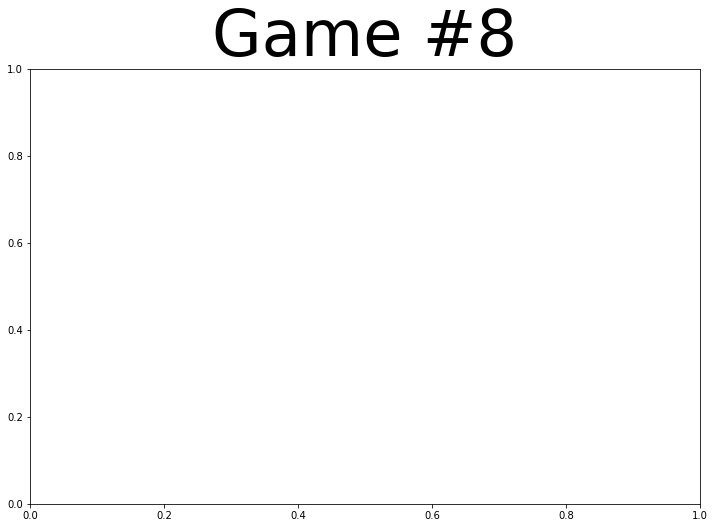

9 (224, 256, 2572)


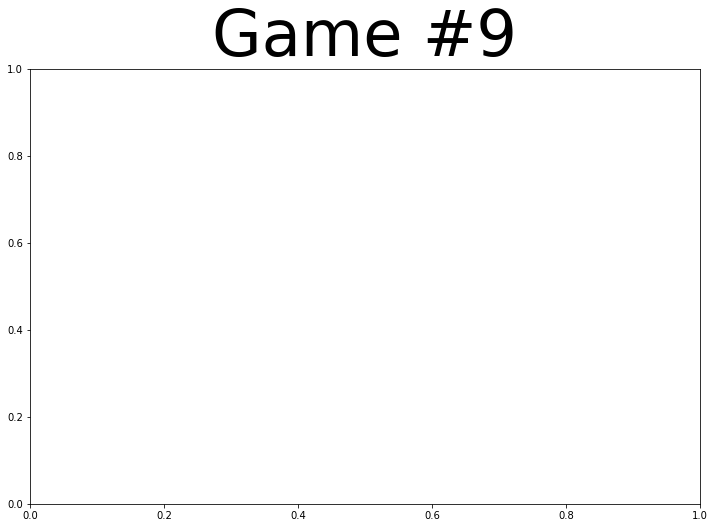

10 (177, 128, 1764)


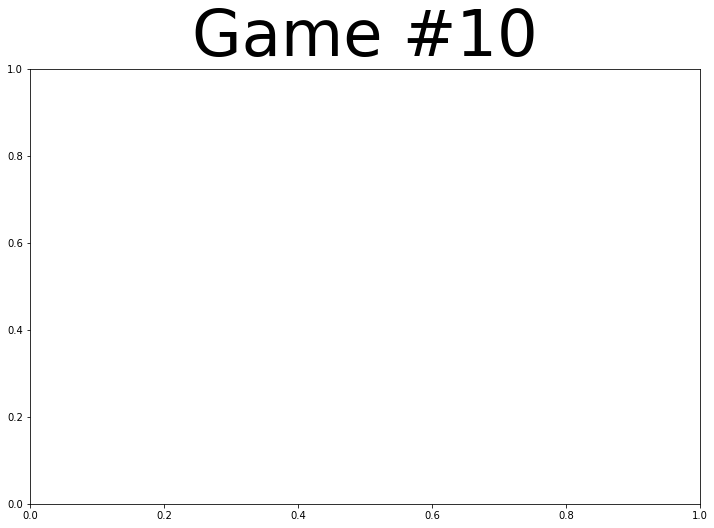

11 (414, 512, 6200)


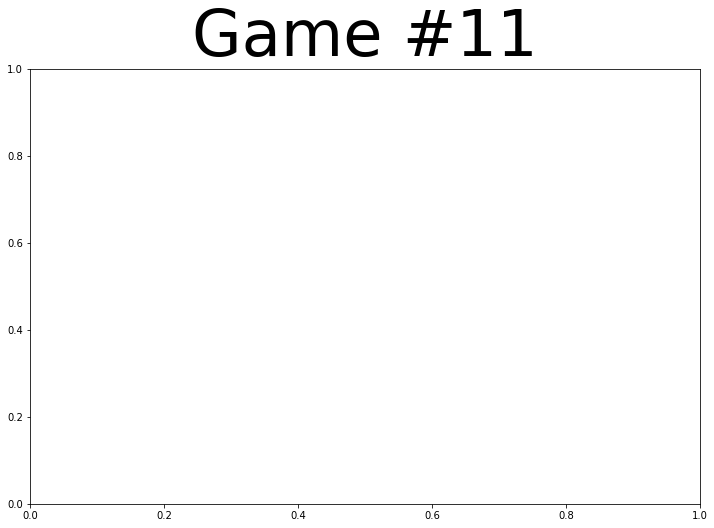

12 (210, 256, 2452)


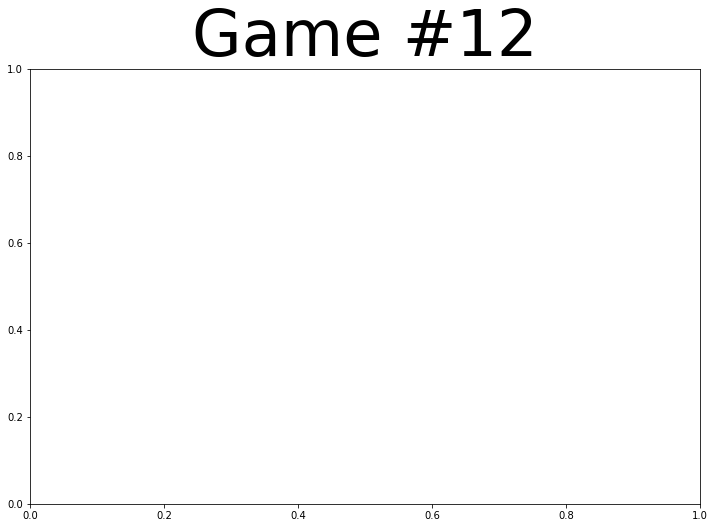

13 (267, 256, 3216)


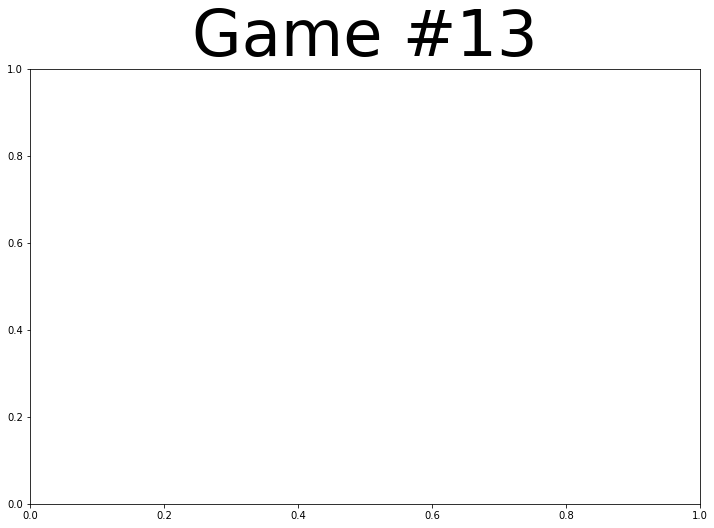

14 (266, 256, 3208)


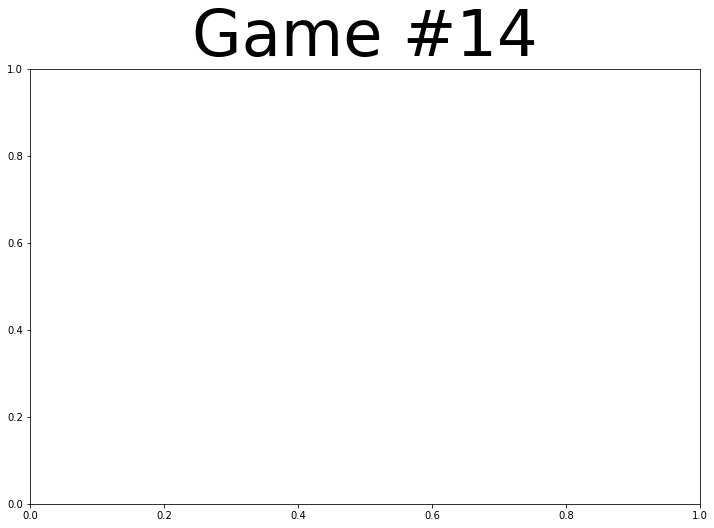

15 (229, 128, 2472)


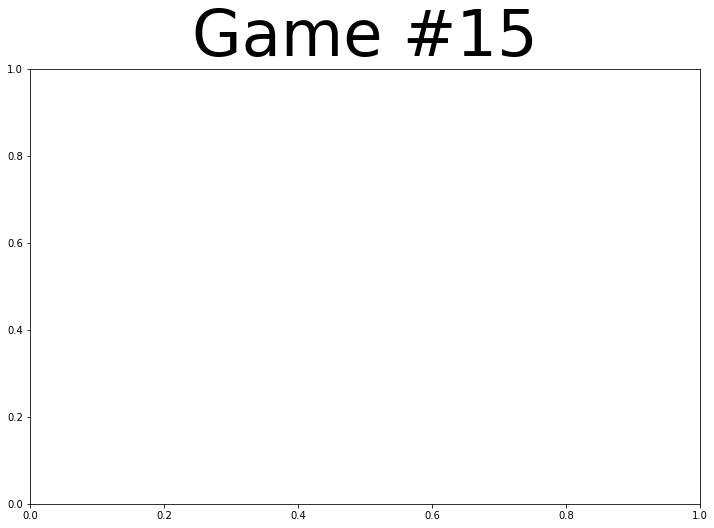

In [ ]:
results = []
# driver = webdriver.Firefox()

options = webdriver.FirefoxOptions()
options.add_argument('--headless')  # to run the browser in headless mode
options.binary_location = '/usr/bin/firefox'

driver = webdriver.Firefox(options=options, executable_path='/usr/bin/geckodriver')

graph = plt.plot([], [], 'b')[0]
dots256 = plt.plot([],[], 'ro')[0]
dots512 = plt.plot([],[], 'yo')[0]
dots1024 = plt.plot([],[], 'go')[0]
plt.xlim((0,100))
plt.ylim((0,25000))
for j in range(200):
    driver.get("https://gabrielecirulli.github.io/2048/")
    time.sleep(2)
    result = gen_sample_and_learn(driver)
    print(j, result)
    results.append(result)
    graph.set_data(np.arange(len(results)), np.array(results)[:, 2])
    dots_data =[[],[],[]]
    for i, d in enumerate(results):
        c = 0 if d[1]<=256 else (1 if d[1]==512 else 2)
        dots_data[c].append([i, d[2]])
    dots_graph = [dots256, dots512, dots1024]
    for i in range(3):
        if dots_data[i]:
            xy = np.array(dots_data[i])
            dots_graph[i].set_data(xy[:, 0], xy[:,1])
    plt.title("Game #%d"%j, fontsize=64)
    plt.draw()
    plt.pause(3)
    if result[1] >= 2048:
        break